# Python Practice:  Building a Python class to model a DNA sequence

## Background

DNA (deoxyribonucleic acid) are the molecules that form the "code" for all life: humans, animals, plants, microbes, even viruses.  Each DNA molecule consists of two parallel strands, where each strand is a long chain comprised of four types of nucleotides or "bases":
- Adenine (represented by "A")
- Cytosine (represented by "C")
- Guanine (represented by "G")
- Thymine (represented by "T")

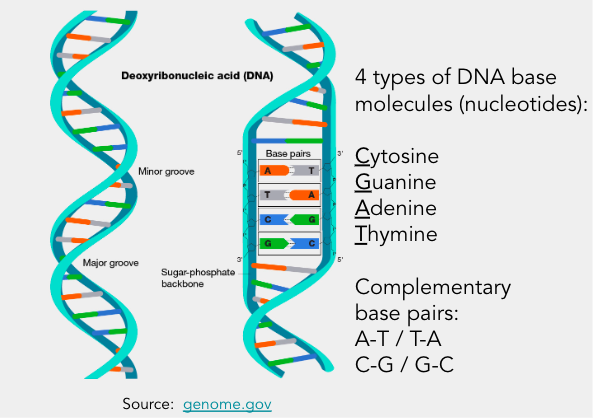

Bases are also _complementary_ in that A in one strand is always matched with T in the other strand, and C in one strand is always matched with G in the other strand.

The Central Dogma of Molecular Biology is that DNA "unzips" and is _transcribed_ into single-stranded messenger RNA (mRNA), and mRNA is _translated_ into amino acids, where every set of 3 bases is a "codon" which codes for a single amino acid.  Amino acids then form chains, called proteins.  Proteins are needed for all functions of life.

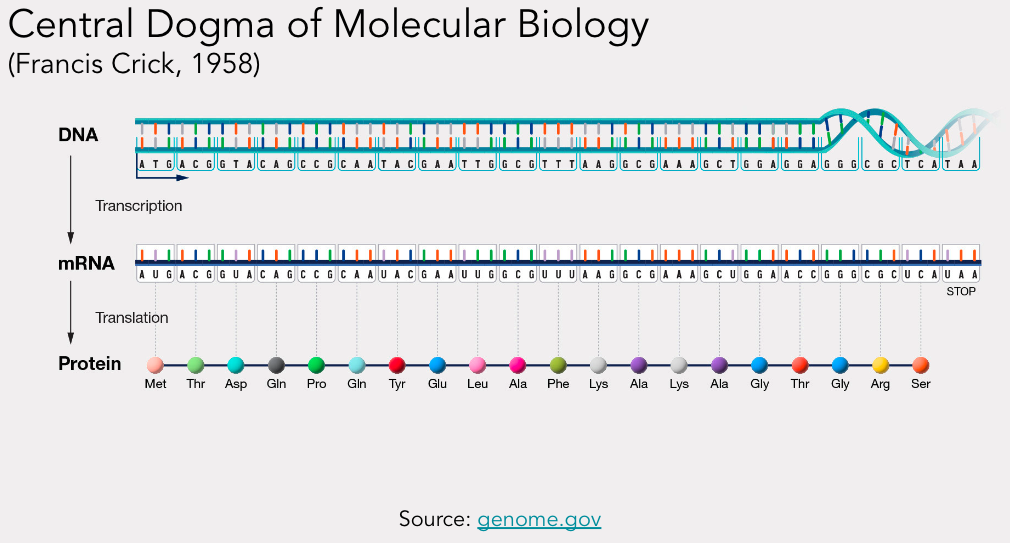

Over the past 20 years, it has become much, much cheaper to sequence genomes (an organism's entire set of DNA).  The price for sequencing a human genome, which consists of approximately 3 billion base pairs, is now down around $1000 USD (see https://www.genome.gov/about-genomics/fact-sheets/Sequencing-Human-Genome-cost).  As as result, there has been an explosion of publicly-available genomic data.  One important database, called Genbank (https://www.ncbi.nlm.nih.gov/genbank), based at the U.S. National Institutes of Health, now contains over 2 trillioin bases, from nearby 250 billion sequences (see https://www.ncbi.nlm.nih.gov/genbank/statistics/)

## Genomes as data

Genome sequence reads are often represented in data in [FASTA](https://www.ncbi.nlm.nih.gov/genbank/fastaformat/) format.  A FASTA file is a plain-text file whose contents might look something like this:

```
>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA
CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC
GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
GCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC
GTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT
...
```

Notice that the first line, starting with `>`, contains an annotation describing what this sequence is.  The next lines are the actual data of the sequence, and the data may be divided into multiple lines.

## Our task

We would like to create a Python class to model a DNA sequence, that can do the following:

We want to be able to (upon creation), set its:
- label/annotation
- sequence

Then, we want to be able to ask a DNA sequence "object":
- What is your label/annotation?
- What is your sequence?
- What is the reverse complement of your sequence?
   - Reverse the sequence, then compute the complement of each base (A→T, C→G, G→C, T→A)
   Example:   	        AATC  
   Reverse:	         	  CTAA   
   Reverse complement:	GATT   
- What is the frequency of each nucleotide (A, C, T, G) in your sequence?
     Example:    AAATGCCAT  
     Frequency: A: 40%, C: 20%, G: 10%, T: 20%
- What is the most frequent "word" in your sequence (for example, "ATT" and "GCG" might be a "tie" for the most frequent 3-letter words)

## Boring-but-necessary stuff that we can't avoid (and need to learn how to do in Python)

We HAVE:
- A text file (our FASTA file) at a URL

We WANT:
- A Python variable containing the sequence annotation
- Another Python variable containing the sequence

To get there, we have to (ugh!) figure out how to, in Python:
- Download a file from an internet URL
- Read a text file, and assign the content of its lines to different Python variables
- Deal with things like "line endings"
- Deal with data that's spread over multiple lines
- Get rid of (or skip) characters we don't care about


before we can actually start doing any actual analysis :-(


# `DNAsequence` class

After completing the exercise, your `DNAsequence` class might look something like this.  It has to be at the top of the notebook because we need to define the class before we can start using it.

In [ ]:
class DNAsequence:
  def __init__(self, seq_value, label = None):
    # __init__ is called upon creation of a new instance of the DNAsequence
    # class.  For instance:
    #    dna1 = DNAsequence(seq_value = 'ACTGGTC', label = 'A very small virus')
    # Note that `label` is optional, because we gave it a default value of `None`
    self.seq = seq_value
    self.label = label

  def __str__(self):
    # result of calling print() on this object
    if len(self.seq) >= 20:
      short_seq = self.seq[:20]+'...'
    else:
      short_seq = self.seq
    return f'Label: {self.label}\nSequence: {short_seq}'

  def reverse_complement(self):
    """Return the reverse complement of the sequence"""

    # Create a dictionary that we can use to look up the
    # complement of any nucleotide
    complements_dict = {'A': 'T',
                        'G': 'C',
                        'C': 'G',
                        'T': 'A'}

    seq_list = list(self.seq) # Turn a string into a list of individual characters
    seq_list.reverse() # Reverse it
    # Will need to discuss list comprehensions here (fallback: use a loop)
    rev_comp_list = [complements_dict[s] for s in seq_list] # New list with the complement of each position
    rev_comp = ''.join(rev_comp_list) # Take the list and concatenate it into a single string
    return rev_comp

  def base_distribution(self, relative_frequency = False):
    """Return the frequencies of bases in the sequence

    Keyword arguments:
    relative_frequency -- return relative frequencies rather than absolute frequencies (default False)
    """
    base_list = list(self.seq)
    unique_bases = set(base_list)
    freq_dictionary = {}
    for base in unique_bases:
      if relative_frequency: # If the function was called with relative_frequency = True
        freq_dictionary[base] = round(base_list.count(base)/len(self.seq), \
                                      ndigits = 3)
      else:
        freq_dictionary[base] = base_list.count(base) # Use list.count() to get the # of instances of base in the list
    return freq_dictionary

  def most_frequent_words(self, word_length):
    """Return the word or words with the highest frequency in the sequence.
    Returns a tuple containing the list of most frequent words, and their frequency.

    Keyword arguments:
    word_length -- length of words to compute
    """
    word_freq_dict = {}
    for word_start_position in range(0, len(self.seq) - word_length):
      word = self.seq[word_start_position: (word_start_position + word_length)]
      if word not in word_freq_dict:
        word_freq_dict[word] = 1
      else:
        word_freq_dict[word] = word_freq_dict[word] + 1
    highest_freq = max(word_freq_dict.values())
    most_freq_words = []
    for word, count in word_freq_dict.items():
      if count == highest_freq:
        most_freq_words.append(word)
    return most_freq_words, highest_freq


In [ ]:
def test_DNAsequence():
  """Test class for DNAsequence
  """
  test_seq = 'ACGTCGTAAG'
  test_label = 'Test sequence'
  test_dnaseq = DNAsequence(test_seq, label = test_label)
  assert test_dnaseq.seq == test_seq
  assert test_dnaseq.label == test_label
  #assert test_dnaseq.__str__() == f'Label: {test_label}\nSequence: {test_seq}'
  assert test_dnaseq.reverse_complement() == 'CTTACGACGT'
  base_dist = test_dnaseq.base_distribution()
  assert sorted(base_dist) == sorted({'A': 3, 'C': 2, 'G': 3, 'T': 2})
  base_dist_relative = test_dnaseq.base_distribution(relative_frequency=True)
  assert sorted(base_dist_relative) == sorted({'A': 0.3, 'C': 0.2, 'G': 0.2, 'T': 0.2})
  # If we got this far, none of the tests above failed.
  print("Tests passed")

In [ ]:
test_DNAsequence()

Tests passed


## Download a data file from a URL, and save it "locally" (in our Google virtual machine)

Note that the file should appear in the files list when you click on the file folder icon on the left.  image.png

In [ ]:
import requests

In [ ]:
url = 'https://go.gwu.edu/coviddna'
r = requests.get(url, allow_redirects=True)
open('sars_cov_2.fasta', 'wb').write(r.content)

30428

## Read the file using basic Python file reading functions

In [ ]:
input_file = 'sars_cov_2.fasta'

with open(input_file, 'r') as myfile:
  annotation = myfile.readline().rstrip()[1:] # Skip the first character, which is `>`. rstrip() removes the newline character at the end
  # Below we use a "list comprehension". readlines() returns a list,
  # and we create a new list, where each item is the result of applying .rstrip() on each item in the original list.
  datalines = [line.rstrip() for line in myfile.readlines()]
  # This leaves us with datalines, which is a list of individual lines

In [ ]:
# Concatenate the lines together into a single sequence string
covid_seq = ''.join(datalines)

### 💡 Is this ^^ something that maybe we could _encapsulate_ into a function?

Add this to our "future enhancements list"!

In [ ]:
len(covid_seq)

29903

## Create our DNAsequence object

Call the "constructor" method (defined above as `__init__` )

In [ ]:
dna1 = DNAsequence(covid_seq, annotation)

In [ ]:
dna1.seq

'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

In [ ]:
dna1.label

'NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'

In [ ]:
dna1

In [ ]:
print(dna1)

Label: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Sequence: ATTAAAGGTTTATACCTTCC...


# Start using some of our computation methods

In [ ]:
dna1.reverse_complement()

'TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGTCATTCTCCTAAGAAGCTATTAAAATCACATGGGGATAGCACTACTAAAATTAATTTTACACATTAGGGCTCTTCCATATAGGCAGCTCTCCCTAGCATTGTTCACTGTACACTCGATCGTACTCCGCGTGGCCTCGGTGAAAATGTGGTGGCTCTTTCAAGTCCTCCCTAATGTTACACACTGATTAAAGATTGCTATGTGAGATTAAAGTTAACTACATCTACTTGTGCTATGTAGTTACGAGAATTCATTCTGCACAAGAGTAGACTATATATCGTAAACGGAAAAGCGAAAACGTTTATATAGCCCATCTGCCTTGTGTGGTCTGCATGAGTTTAGGCCTGAGTTGAGTCAGCACTGCTCATGGATTGTTGCAATTGTTTGGAGAAATCATCCAAATCTGCAGCAGGAAGAAGAGTCACAGTTTGCTGTTTCTTCTGTCTCTGCGGTAAGGCTTGAGTTTCATCAGCCTTCTTCTTTTTGTCCTTTTTAGGCTCTGTTGGTGGGAATGTTTTGTATGCGTCAATATGCTTATTCAGCAAAATGACTTGATCTTTGAAATTTGGATCTTTGTCATCCAATTTGATGGCACCTGTGTAGGTCAACCACGTTCCCGAAGGTGTGACTTCCATGCCAATGCGCGACATTCCGAAGAACGCTGAAGCGCTGGGGGCAAATTGTGCAATTTGCGGCCAATGTTTGTAATCAGTTCCTTGTCTGATTAGTTCCTGGTCCCCAAAATTTCCTTGGGTTTGTTCTGGACCACGTCTGCCGAAAGCTTGTGTTACATTGTATGCTTTAGTGGCAGTACGTTTTTGCCGAGGCTTCTTAGAAGCCTCAGCAGCAGATTTCTTAGTGACAGTTTGGCCTTGTTGTTGTTGGCCTTTACCAGACATTTTGCTCTCAAGCTGGTTCAATCTGTCAAGCAGCAGCAAAGCAAGAGCAGCATCACCGCCATTGCCAG

In [ ]:
dna1.base_distribution(relative_frequency=True)

{'G': 0.196, 'A': 0.299, 'C': 0.184, 'T': 0.321}

In [ ]:
dna1.most_frequent_words(6)

(['TTGTTA'], 42)